### Load

In [ ]:
!pip install --upgrade gensim -q
!pip install matplotlib -q

In [1]:
import gensim
from gensim.models import word2vec
from gensim.models.word2vec import Word2Vec
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import spacy
import string

In [2]:
gensim.__version__

'4.3.2'

In [2]:
np.random.seed(42)

Use Pretrained Word Vectors

In [3]:
import gensim.downloader as api
print(list(gensim.downloader.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [4]:
# wv = api.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [8]:
# wv.save('saved_vectors.kv')

In [2]:
from gensim.models import KeyedVectors
wv = KeyedVectors.load('saved_vectors.kv')

In [12]:
type(wv)

gensim.models.keyedvectors.KeyedVectors

In [38]:
wv['apple']

array([-0.06445312, -0.16015625, -0.01208496,  0.13476562, -0.22949219,
        0.16210938,  0.3046875 , -0.1796875 , -0.12109375,  0.25390625,
       -0.01428223, -0.06396484, -0.08056641, -0.05688477, -0.19628906,
        0.2890625 , -0.05151367,  0.14257812, -0.10498047, -0.04736328,
       -0.34765625,  0.35742188,  0.265625  ,  0.00188446, -0.01586914,
        0.00195312, -0.35546875,  0.22167969,  0.05761719,  0.15917969,
        0.08691406, -0.0267334 , -0.04785156,  0.23925781, -0.05981445,
        0.0378418 ,  0.17382812, -0.41796875,  0.2890625 ,  0.32617188,
        0.02429199, -0.01647949, -0.06494141, -0.08886719,  0.07666016,
       -0.15136719,  0.05249023, -0.04199219, -0.05419922,  0.00108337,
       -0.20117188,  0.12304688,  0.09228516,  0.10449219, -0.00408936,
       -0.04199219,  0.01409912, -0.02111816, -0.13476562, -0.24316406,
        0.16015625, -0.06689453, -0.08984375, -0.07177734, -0.00595093,
       -0.00482178, -0.00089264, -0.30664062, -0.0625    ,  0.07

In [7]:
len(wv['apple'])

300

### research

In [9]:
wv.similarity("apple", "mango")

0.57518554

In [10]:
wv.similarity("apple", "car")

0.12830707

In [11]:
pairs = [
    ('car', 'minivan'),   # a minivan is a kind of car
    ('car', 'bicycle'),   # still a wheeled vehicle
    ('car', 'airplane'),  # ok, no wheels, but still a vehicle
    ('car', 'cereal'),    # ... and so on
    ('car', 'communism'),
]
for w1, w2 in pairs:
    print('%r\t%r\t%.2f' % (w1, w2, wv.similarity(w1, w2)))

'car'	'minivan'	0.69
'car'	'bicycle'	0.54
'car'	'airplane'	0.42
'car'	'cereal'	0.14
'car'	'communism'	0.06


In [12]:
print(wv.most_similar(positive=['car', 'minivan'], topn=5))

[('SUV', 0.8532192707061768), ('vehicle', 0.8175783753395081), ('pickup_truck', 0.7763688564300537), ('Jeep', 0.7567334175109863), ('Ford_Explorer', 0.7565720081329346)]


In [13]:
print(wv.doesnt_match(['fire', 'water', 'land', 'sea', 'air', 'car']))

car


#### Semantic regularities captured in word embeddings

In [14]:
wv.most_similar(positive=['woman', 'king'], negative=['man'], topn=3)

[('queen', 0.7118193507194519),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951)]

In [ ]:
wv.most_similar(positive=['woman', 'king'], topn=3)

[('man', 0.6628609299659729),
 ('queen', 0.6438563466072083),
 ('girl', 0.6136074066162109)]

In [16]:
words = ["one",'two','man','woman','table']

In [ ]:
# https://deepai.org/dataset/text8

### Visualizing these word vectors

In [17]:
sample_vectors = np.array([wv[word] for word in words])
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
result = pca.fit_transform(sample_vectors)
result

array([[ 0.41775945,  0.906729  ],
       [ 0.52036536,  1.3947775 ],
       [-1.2547548 , -0.3259122 ],
       [-1.6043063 , -0.64717937],
       [ 1.920937  , -1.328415  ]], dtype=float32)

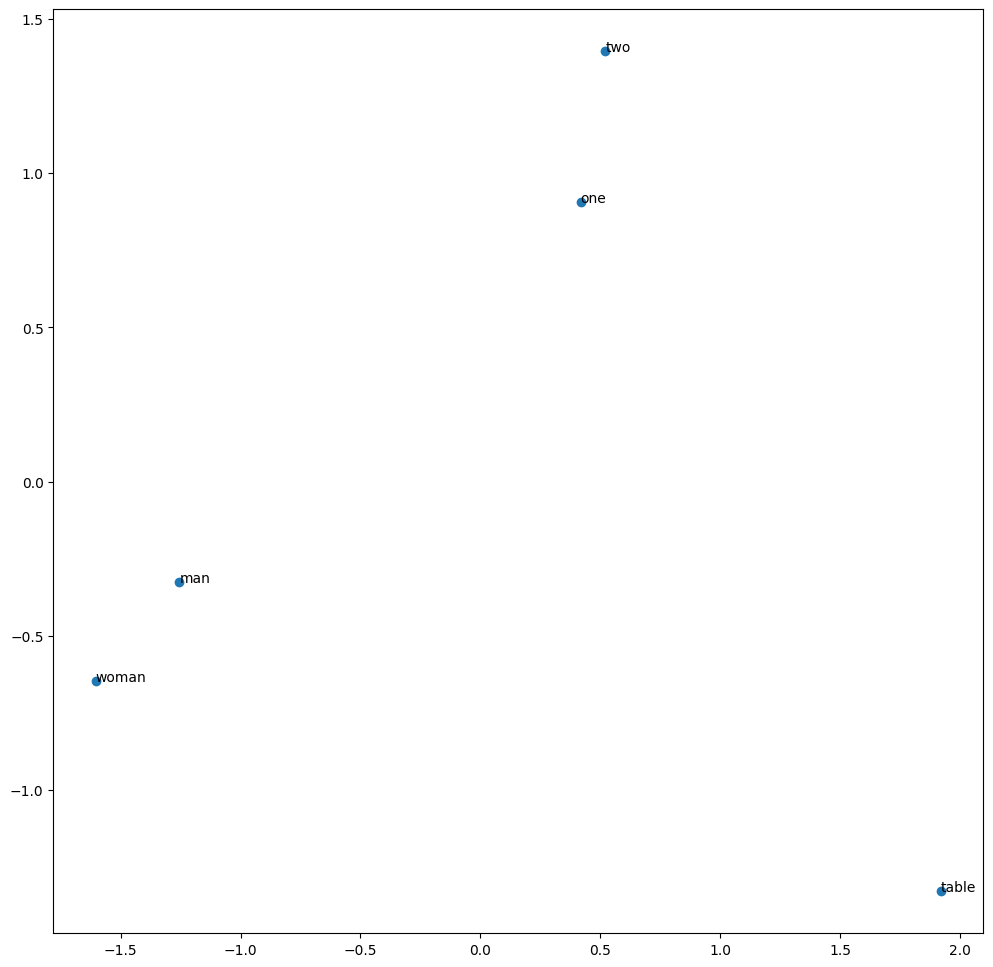

In [18]:
plt.figure(figsize=(12,12))
plt.scatter(result[:,0], result[:,1])
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

## Main

### prepare

In [27]:
data = pd.read_csv("train.csv", engine="python")
data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


#### funcs

In [7]:
def sent_vec(sent):
    vector_size = wv.vector_size
    wv_res = np.zeros(vector_size)
    # print(wv_res)
    ctr = 1
    for w in sent:
        if w in wv:
            ctr += 1
            wv_res += wv[w]
    wv_res = wv_res/ctr
    return wv_res

In [6]:
def my_vec_maker(sent: list[str]):
    wv_res = []
    for word in sent:
        if word in wv:
            wv_res.append(wv[word])
    if len(wv_res) == 0:
        wv_res.append(np.zeros(wv.vector_size))
    return wv_res

In [8]:
# Creating our tokenizer function
def spacy_tokenizer(sentence):
    # Creating our token object, which is used to create documents with linguistic annotations.
    doc = nlp(sentence)

    # Lemmatizing each token and converting each token into lowercase
    mytokens = [ word.lemma_.lower().strip() for word in doc ]

    # Removing stop words
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]

    # return preprocessed list of tokens
    return mytokens

In [27]:
sent_vec("I am happy")

array([-0.08447266,  0.10973685, -0.00453404,  0.18362863, -0.05944824,
       -0.04013497, -0.10041155,  0.03710938, -0.02503313,  0.04729353,
       -0.07543836, -0.16434152, -0.1116333 ,  0.02915737, -0.12290737,
        0.10421317, -0.00425502,  0.27535575, -0.01681083, -0.08075387,
       -0.26747349, -0.07281712,  0.08138602, -0.02498954, -0.05358887,
       -0.07969884, -0.30385045,  0.10531616, -0.03756278, -0.04029192,
        0.06455776, -0.02200753, -0.11361694, -0.12702288, -0.19824219,
        0.06921387, -0.14557757,  0.18457031, -0.05542864,  0.10093471,
        0.10728237, -0.07920619, -0.01236398,  0.11485073,  0.09437779,
        0.02020509, -0.08954729, -0.12911551, -0.0363072 ,  0.05212402,
       -0.12200056,  0.23856027, -0.04056222,  0.12512207,  0.05569894,
        0.1237793 , -0.08370536, -0.05489676, -0.0291748 , -0.18401228,
       -0.14592634, -0.04910714, -0.15844727, -0.03636387,  0.00628662,
       -0.30032785, -0.11404855,  0.08530971,  0.01077706,  0.05

In [66]:
res = my_vec_maker(["happy","king"])
print(len(res))
type(res[1])

2


numpy.ndarray

#### create tokens

In [29]:
nlp = spacy.load("en_core_web_sm")
stop_words = nlp.Defaults.stop_words
print(stop_words)

{'somehow', 'did', 'same', 'formerly', 'anyway', 'seem', 'yourself', 'thus', 'rather', 'none', 'neither', '‘s', 'below', 'because', 'cannot', 'with', 'thereupon', 'which', 'yourselves', 'n‘t', 'although', 'amount', 'make', 'hence', 'nothing', 'its', 'up', 'everyone', 'also', 'hers', 'ca', 'whither', 'n’t', 'only', 'beside', 'somewhere', 'last', 'anywhere', 'onto', 'we', 'than', 'first', 'whereafter', 'move', 'namely', 'i', 'through', 'eight', 'often', 'where', 'afterwards', 'under', 'that', 'still', 'one', 'such', '‘re', 'twelve', 'ten', 'throughout', '’re', 'thereafter', 'two', 'towards', 'ever', 'except', 'perhaps', 'very', 'once', 'again', "'d", 'less', 'elsewhere', 'seems', 'other', 'more', 'upon', 'former', 'much', 'him', 'against', 'his', 'among', 'might', 'whereupon', 'her', '’s', 'go', 'nowhere', 'anyhow', 'though', 'indeed', 'every', 'whereby', 'get', 'during', 'she', 'everything', 'never', 'nevertheless', 'then', 'using', 'else', 'if', 'bottom', 'any', 'everywhere', 'six', 'u

In [30]:
punctuations = string.punctuation
print(punctuations)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [30]:
# data['tokens'] = data['comment_text'].apply(spacy_tokenizer)

In [31]:
data.head()

,comment_text,toxic,tokens
0,Explanation\nWhy the edits made under my usern...,0,"['explanation', 'edit', 'username', 'hardcore'..."
1,D'aww! He matches this background colour I'm s...,0,"[""d'aww"", 'match', 'background', 'colour', 'se..."
2,"Hey man, I'm really not trying to edit war. It...",0,"['hey', 'man', 'try', 'edit', 'war', 'guy', 'c..."
3,"""\nMore\nI can't make any real suggestions on ...",0,"['real', 'suggestion', 'improvement', 'wonder'..."
4,"You, sir, are my hero. Any chance you remember...",0,"['sir', 'hero', 'chance', 'remember', 'page']"


In [18]:
data = data.drop(columns=["Unnamed: 0","id","severe_toxic","obscene","threat","insult","identity_hate"])
data

,comment_text,toxic,tokens
0,"Geez, are you forgetful! We've already discus...",0,"['geez', 'forgetful', 'discuss', 'marx', 'anar..."
1,Carioca RFA \n\nThanks for your support on my ...,0,"['carioca', 'rfa', 'thank', 'support', 'reques..."
2,"""\n\n Birthday \n\nNo worries, It's what I do ...",0,"['birthday', 'worry', ';)', 'enjoy', 'ur', 'da..."
3,Pseudoscience category? \n\nI'm assuming that ...,0,"['pseudoscience', 'category', 'assume', 'artic..."
4,"(and if such phrase exists, it would be provid...",0,"['phrase', 'exist', 'provide', 'search', 'engi..."
...,...,...,...
39888,citation listed is a valid source. deal with ...,0,"['citation', 'list', 'valid', 'source', 'deal'..."
39889,Fuck you!!!!!!!!!!!! \n\nand your foot,1,"['fuck', 'foot']"
39890,A photo of a magazine cover in a Wikipedia art...,0,"['photo', 'magazine', 'cover', 'wikipedia', 'a..."
39891,""":* Danon says bluntly that he wants to take t...",0,"[':*', 'danon', 'bluntly', 'want', 'bulk', 'we..."


#### save cut

In [20]:
# data = data.sample(frac=0.60, random_state=42) # cut 40%
data.to_csv('modified_cut.csv', index=False)

#### load

In [22]:
data = None
data = pd.read_csv("modified_cut.csv", engine="python")
data

,comment_text,toxic,tokens
0,Thanks for your comprenhension.,0,"['thank', 'comprenhension']"
1,ass bleed todeath slowly. so their sexuall ple...,1,"['ass', 'bleed', 'todeath', 'slowly', 'sexuall..."
2,"""\n\nI must admit that I am quite surprised, a...",0,"['admit', 'surprised', 'slightly', 'entertain'..."
3,"""::::::: Hi consensus means that every body m...",0,"['hi', 'consensus', 'mean', 'body', 'agree', '..."
4,Being you train with a convicted animal abuser...,0,"['train', 'convict', 'animal', 'abuser', 'http..."
...,...,...,...
23931,Also I think Vegetable Basket needs it's own W...,0,"['think', 'vegetable', 'basket', 'need', 'wiki..."
23932,"""\n\n(Sorry for the late response). I reverted...",0,"['sorry', 'late', 'response', 'revert', 'block..."
23933,"""\n\n Good job \n\nThis article was in hiding ...",0,"['good', 'job', 'article', 'hiding', 'long', '..."
23934,Mind however that most of this is already on P...,0,"['mind', 'polish', 'wiki', 'involvment']"


#### create vec

In [23]:
# data['vec'] = data['tokens'].apply(sent_vec)
data['vec'] = data['tokens'].apply(my_vec_maker)

In [24]:
data.head()

,comment_text,toxic,tokens,vec
0,Thanks for your comprenhension.,0,"['thank', 'comprenhension']","[[-0.33789062, 0.19824219, -0.296875, 0.148437..."
1,ass bleed todeath slowly. so their sexuall ple...,1,"['ass', 'bleed', 'todeath', 'slowly', 'sexuall...","[[-0.29101562, 0.17871094, 0.050048828, 0.0981..."
2,"""\n\nI must admit that I am quite surprised, a...",0,"['admit', 'surprised', 'slightly', 'entertain'...","[[-0.09082031, 0.25585938, 0.08935547, 0.14843..."
3,"""::::::: Hi consensus means that every body m...",0,"['hi', 'consensus', 'mean', 'body', 'agree', '...","[[-0.28710938, 0.29296875, -0.044677734, 0.038..."
4,Being you train with a convicted animal abuser...,0,"['train', 'convict', 'animal', 'abuser', 'http...","[[-0.33789062, 0.19824219, -0.296875, 0.148437..."


In [31]:
# X = np.vstack(data['vec'].to_list())
X = data['vec'].to_list()
# .to_list()
y = data['toxic'].to_list()

In [32]:
print(len(X[0]))
X[0]

18


[array([-3.37890625e-01,  1.98242188e-01, -2.96875000e-01,  1.48437500e-01,
        -2.17773438e-01, -3.68652344e-02, -5.82885742e-03, -1.21093750e-01,
         1.42578125e-01, -5.05371094e-02, -5.90820312e-02, -7.42187500e-02,
        -2.51953125e-01, -6.83593750e-02, -1.22558594e-01,  1.63085938e-01,
         2.74658203e-03,  3.61328125e-01, -5.67626953e-03, -1.25976562e-01,
        -2.91015625e-01, -1.12792969e-01,  2.57812500e-01, -7.17773438e-02,
         2.36816406e-02, -7.51953125e-02, -3.67187500e-01,  2.78320312e-02,
        -2.44140625e-01, -8.30078125e-03,  1.23046875e-01,  1.20605469e-01,
         9.33837891e-03,  8.85009766e-03, -1.00585938e-01,  1.98242188e-01,
        -4.92187500e-01,  1.47460938e-01,  1.52343750e-01,  1.25000000e-01,
        -8.30078125e-02, -1.52343750e-01,  1.75781250e-01, -5.54199219e-02,
         4.39453125e-03, -3.36914062e-02,  7.08007812e-02, -5.37109375e-02,
        -1.24511719e-01,  2.34375000e-01, -1.40625000e-01,  2.36328125e-01,
        -1.5

### train

In [36]:
# Load the en_core_web_lg model
# nlp = spacy.load('en_core_web_lg', disable=["tagger", "parser", "ner"])

# create train set by getting the document vector
docs = [nlp(doc).vector for doc in data["comment_text"]]
X = np.vstack(docs)
y = data['toxic'].to_list()
print('Shape of train set: {}'.format(X.shape))


NameError: name 'nlp' is not defined

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y)

from sklearn.linear_model import LogisticRegression
# classifier = LogisticRegression()

# classifier.fit(X_train,y_train)

In [35]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

# create machine learning pipeline
word2vec_pipe = Pipeline([('estimator', LogisticRegression())])

# cross validate
print('F1 score: {:.3f}'.format(np.mean(cross_val_score(word2vec_pipe, X_train, y_train, scoring = 'f1'))))

# fit pipeline
word2vec_pipe.fit(X_train, y_train)

# predict on test set
predicted = word2vec_pipe.predict(X_test)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (19148,) + inhomogeneous part.

In [19]:
from sklearn import metrics
# predicted = classifier.predict(X_test)
print("Logistic Regression Accuracy:",metrics.accuracy_score(y_test, predicted))
print("Logistic Regression Precision:",metrics.precision_score(y_test, predicted))
print("Logistic Regression Recall:",metrics.recall_score(y_test, predicted))
print("Logistic Regression log_loss:",metrics.log_loss(y_test, predicted))

Logistic Regression Accuracy: 0.9103869653767821
Logistic Regression Precision: 0.7002012072434608
Logistic Regression Recall: 0.11376266753841124
Logistic Regression log_loss: 3.229981159106221
